# Comparative analysis of classification models, calibration, bagging

### <span style="color:blue"> Cognition comes by comparison! Friedrich Wilhelm Nietzsche

The best knowledge can be obtained by comparing many models from different perspectives. In this study, I used data about people studying whether they would have a stroke or not.Withh the help of predict_prob with a properly working model, it is possible to provide each test person with the probability that they will have a stroke. By controlling age, you can show him the likelihood of stroke in the next years of life. The database is easily available on the internet.

In my research I used this database but changed the formula of the analysis slightly. I imagined it was a test for the currently popular COVID-19. With tests on COVID-19 it is like this:
1. It is important and even crucial that they have tests give high detectability because if we release a patient who will have COVID-19 and we will say that he is healthy. It can infect many people and put them at risk of losing their lives. Poor detection also means having to repeat tests, which is expensive and inefficient.
2. It is also important not to scare healthy people that they have COVID-19.

My test is a great research laboratory for classification models:
At the same time, it examines 9 classification models from different families, and compiles the assessment indicators of these models into one table. In addition, it strengthens all models by loading - i.e. we already have 18 honeys. Then the program can calibrate models, which means 36 models. Another function is cross-validation which is an effective way to improve model properties even though it takes a terrible amount of time. After applying the calibration we already have 54 models.

In this exercise, I calibrated the models, but gave up cross-verification, so the calculation time was significantly reduced.

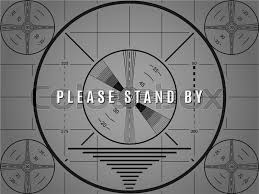

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.ensemble import BaggingClassifier
from simple_colors import * 
from prettytable import PrettyTable

warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('/home/wojciech/Pulpit/1/Stroke_Prediction.csv')
print(df.shape)
print()
print(df.columns)
df.head(3)

(43400, 12)

Index(['ID', 'Gender', 'Age_In_Days', 'Hypertension', 'Heart_Disease',
       'Ever_Married', 'Type_Of_Work', 'Residence', 'Avg_Glucose', 'BMI',
       'Smoking_Status', 'Stroke'],
      dtype='object')


,ID,Gender,Age_In_Days,Hypertension,Heart_Disease,Ever_Married,Type_Of_Work,Residence,Avg_Glucose,BMI,Smoking_Status,Stroke
0,31153,Male,1104.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30650,Male,21204.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,17412,Female,2928.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


Sample reduction:

In [2]:
df = df.sample(frac = 0.50, random_state=10) 
df.shape

(21700, 12)

#### Start pomiaru czasu

In [3]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

Thu Jun  4 13:16:32 2020


### Tool for automatic coding of discrete variables
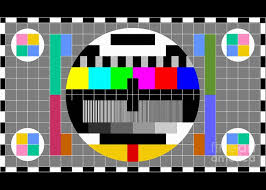

In [4]:
a,b = df.shape     #<- ile mamy kolumn
b

print('DISCRETE FUNCTIONS CODED')
print('------------------------')
for i in range(1,b):
    i = df.columns[i]
    f = df[i].dtypes
    if f == np.object:
        print(i,"---",f)   
    
        if f == np.object:
        
            df[i] = pd.Categorical(df[i]).codes
        
            continue

DISCRETE FUNCTIONS CODED
------------------------
Gender --- object
Ever_Married --- object
Type_Of_Work --- object
Residence --- object
Smoking_Status --- object


In [5]:
df.fillna(7777, inplace=True)

In [6]:
X = df.drop('Stroke', axis=1) 
y = df['Stroke']  

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123,stratify=y)

# <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3">Oversampling   !! 
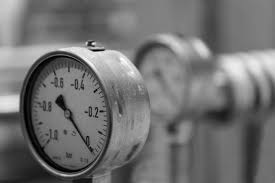

In [7]:
def oversampling(ytrain, Xtrain):
    import matplotlib.pyplot as plt
    
    global Xtrain_OV
    global ytrain_OV

    calss1 = np.round((sum(ytrain == 1)/(sum(ytrain == 0)+sum(ytrain == 1))),decimals=2)*100
    calss0 = np.round((sum(ytrain == 0)/(sum(ytrain == 0)+sum(ytrain == 1))),decimals=2)*100
    
    print("y = 0: ", sum(ytrain == 0),'-------',calss0,'%')
    print("y = 1: ", sum(ytrain == 1),'-------',calss1,'%')
    print('--------------------------------------------------------')
    
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    print()
    
    Proporcja = sum(ytrain == 0) / sum(ytrain == 1)
    Proporcja = np.round(Proporcja, decimals=0)
    Proporcja = Proporcja.astype(int)
       
    ytrain_OV = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
    Xtrain_OV = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)
    
    ytrain_OV = pd.concat([ytrain, ytrain_OV], axis = 0).reset_index(drop = True)
    Xtrain_OV = pd.concat([Xtrain, Xtrain_OV], axis = 0).reset_index(drop = True)
    
    Xtrain_OV = pd.DataFrame(Xtrain_OV)
    ytrain_OV = pd.DataFrame(ytrain_OV)
    

    
    print("Before oversampling Xtrain:     ", Xtrain.shape)
    print("Before oversampling ytrain:     ", ytrain.shape)
    print('--------------------------------------------------------')
    print("After oversampling Xtrain_OV:  ", Xtrain_OV.shape)
    print("After oversampling ytrain_OV:  ", ytrain_OV.shape)
    print('--------------------------------------------------------')
    
    
    ax = plt.subplot(1, 2, 1)
    ytrain.value_counts(dropna = False, normalize=True).plot(kind='pie',title='Before oversampling')
    plt.show
    
       
    kot = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0)
    kot = pd.concat([ytrain, kot], axis = 0).reset_index(drop = True)
    ax = plt.subplot(1, 2, 2)
    kot.value_counts(dropna = False, normalize=True).plot(kind='pie',title='After oversampling')
    plt.show

y = 0:  17040 ------- 98.0 %
y = 1:  320 ------- 2.0 %
--------------------------------------------------------

Before oversampling Xtrain:      (17360, 11)
Before oversampling ytrain:      (17360,)
--------------------------------------------------------
After oversampling Xtrain_OV:   (34320, 11)
After oversampling ytrain_OV:   (34320, 1)
--------------------------------------------------------


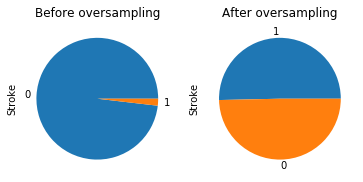

In [8]:
oversampling(y_train, X_train)

I used six models of GaussianNB, LogisticRegression, CatBoostClassifier in their basic version without oversamplin and with oversampling. We will see what differences in the minority set classification the oversampling method gives.!!

I get rid of one dimension from the ytrain_OV set so that the set is similar to y_test.

In [9]:
print(Xtrain_OV.shape)
print(ytrain_OV.shape)
ytrain_OV = ytrain_OV['Stroke']
print(ytrain_OV.shape)

(34320, 11)
(34320, 1)
(34320,)


W poprzednim wpisie uznaliśmy, że oversampling poprawiło jakość klasyfikacji. Kolejne działania będą opierały sie na danych zbilansowanych przez oversampling. Dlatego teraz podmieniamy zwykłą próbę na próbę po oversamoling.

In [10]:
X_train = Xtrain_OV
y_train = ytrain_OV
print(X_train.shape)
print(y_train.shape)

(34320, 11)
(34320,)


## Oversampling for cross-validation

Cross-validation should be done for a full set. therefore oversampling should be performed for a balanced set first. In my exercise I took a shortcut and did oversampling on a training set. However, I left this option. There 

In [11]:
X = df.drop('Stroke', axis=1) 
y = df['Stroke']  

In [12]:
X.shape

(21700, 11)

In [13]:
Data = Xtrain_OV
target = ytrain_OV
print("output:",Data.shape)
print("output:",target.shape)
print('----------')
print("input:", df.shape)

output: (34320, 11)
output: (34320,)
----------
input: (21700, 12)


## I create 4 groups of classifiers:
1. Normal classifiers after oversampling,
2. Classifiers after bagging
3. Standard calibrators
4. Classifiers after bagging calibrated

### Below are 2 basic groups: 1. Classifiers after oversampling, 2. Classifiers after bagging

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
import time

NBC = GaussianNB()
LRE = LogisticRegression(solver='lbfgs')
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
LGBM = LGBMClassifier() 
CBC = CatBoostClassifier(verbose=0, n_estimators=100)
XGB = XGBClassifier()
LREN = LogisticRegression(solver='newton-cg')
KNN = KNeighborsClassifier(n_neighbors=1, p=2)
SVM = SVC(probability=True) 


classifiers_A = [SVM,CBC,XGB,LGBM,KNN,NBC,LRE,RFC,GBC]
nameA = ['SVM','CBC','XGB','LGBM','KNN','NBC','LRE','RFC','GBC']

for n,t in zip(nameA,classifiers_A):          ## Szkolenie modeli w pętli
    start_time = time.time()
    t.fit(X_train, y_train)
    p = np.round((time.time() - start_time),decimals=1)
    print(blue(n),p,"---",time.ctime())



### Wzmacnianie przez bagowanie!

NBC_b = BaggingClassifier(base_estimator=NBC, n_estimators=10, max_samples=0.8, max_features=0.8)
LRE_b = BaggingClassifier(base_estimator=LRE, n_estimators=10, max_samples=0.8, max_features=0.8)
GBC_b = BaggingClassifier(base_estimator=GBC, n_estimators=10, max_samples=0.8, max_features=0.8)
RFC_b = BaggingClassifier(base_estimator=RFC, n_estimators=10, max_samples=0.8, max_features=0.8)
LGBM_b = BaggingClassifier(base_estimator=LGBM, n_estimators=10, max_samples=0.8, max_features=0.8)
CBC_b = BaggingClassifier(base_estimator=CBC, n_estimators=10, max_samples=0.8, max_features=0.8)
XGB_b = BaggingClassifier(base_estimator=XGB, n_estimators=10, max_samples=0.8, max_features=0.8)
SVM_b = BaggingClassifier(base_estimator=SVM, n_estimators=10, max_samples=0.8, max_features=0.8)
KNN_b = BaggingClassifier(base_estimator=KNN, n_estimators=10, max_samples=0.8, max_features=0.8)



classifiers_B = [SVM_b,CBC_b,XGB_b,LGBM_b,KNN_b,NBC_b,LRE_b,RFC_b,GBC_b]
nameB = ['SVM_b','CBC_b','XGB_b','LGBM_b','KNN_b','NBC_b','LRE_b','RFC_b','GBC_b']
 
print('-------------------------------------')
    
for f,p in zip(nameB,classifiers_B):            ## Szkolenie zbagowanych modeli w pętli
    start_time = time.time()
    p.fit(X_train, y_train)         
    k = np.round((time.time() - start_time),decimals=1)
    print(blue(f),k,"---",time.ctime())


SVM 263.1 --- Thu Jun  4 13:20:56 2020
CBC 0.8 --- Thu Jun  4 13:20:57 2020
XGB 1.3 --- Thu Jun  4 13:20:58 2020
LGBM 0.4 --- Thu Jun  4 13:20:59 2020
KNN 0.1 --- Thu Jun  4 13:20:59 2020
NBC 0.0 --- Thu Jun  4 13:20:59 2020
LRE 0.5 --- Thu Jun  4 13:20:59 2020
RFC 3.7 --- Thu Jun  4 13:21:03 2020
GBC 5.3 --- Thu Jun  4 13:21:08 2020
-------------------------------------
SVM_b 774.0 --- Thu Jun  4 13:34:02 2020
CBC_b 6.9 --- Thu Jun  4 13:34:09 2020
XGB_b 11.5 --- Thu Jun  4 13:34:20 2020
LGBM_b 3.5 --- Thu Jun  4 13:34:24 2020
KNN_b 0.5 --- Thu Jun  4 13:34:25 2020
NBC_b 0.1 --- Thu Jun  4 13:34:25 2020
LRE_b 2.4 --- Thu Jun  4 13:34:27 2020
RFC_b 18.7 --- Thu Jun  4 13:34:46 2020
GBC_b 26.0 --- Thu Jun  4 13:35:12 2020


# <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3">Cross validation
#### <span style="color:blue">Division into folds for all models:
    
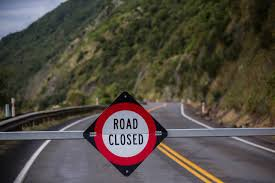
   

### <span style="color:blue">A set of hyperparameters for each model:

### <span style="color:blue">Inserting each model into the grid seat:

### <span style="color:blue">Exercise model using the full range of balanced data (after oversample):

### <span style="color:blue">Checking the best set of hyperparameters:

## Time is money 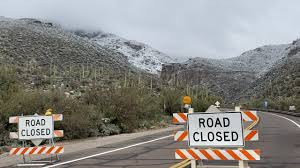

## <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3"> The most important type of Type_error set for me

#### <span style="color:blue">False_Positive_Rate 
    - percentage share of healthy people recognized by the model as sick in the population of healthy people

#### <span style="color:blue">True_Positive_Rate RECALL 
    - this indicator shows how detectable the disease is by the model.

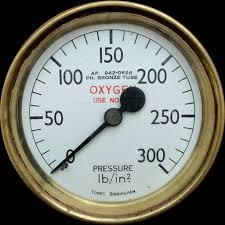

In [15]:
def Type_error(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=True):

    
    from sklearn.datasets import make_classification
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve
    from sklearn.metrics import confusion_matrix
    
    from sklearn import metrics
    import simple_colors
    import time   
    
    start_time = time.time()
    
    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train)    
    
    FPR = ['False_Positive_Rate:']
    TPR = ['True_Positive_Rate: ']
    FNR = ['False_Negative_Rate: ']
    SPEC = ['Specifity']
    
    CAL_FPR = ['CAL_False_Positive_Rate:']
    CAL_TPR = ['CAL_True_Positive_Rate: ']
    CAL_FNR = ['CAL_False_Negative_Rate: ']
    CAL_SPEC = ['CAL_Specifity']

    def compute_metric(model):
        
        
        #model = model.fit(X_train,y_train)   #<-- model już przećwiczył się na pełnych danych
        cm = confusion_matrix(y_test, model.predict(X_test))
        tn, fp, fn, tp = cm.ravel()
        # print('tn: ',tn)
        # print('fp: ',fp)
        # print('fn: ',fn)
        # print('tp: ',tp)
        # print('------------------')
        # print(cm) 
        

        FPR = np.round(fp/(fp + tn),decimals=3)
        TPR = np.round(tp/(tp + fn),decimals=3)
        FNR = np.round(fn/(tp + fn),decimals=3)
        SPEC = np.round(tn/(tn + fp),decimals=3)

        return FPR,TPR,FNR,SPEC

    for cls in six_classifiers:      
        
        results = compute_metric(cls)
        FPR.append(red(results[0],'bold'))
        TPR.append(red(results[1],'bold'))
        FNR.append(results[2])
        SPEC.append(results[3])

    t = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
    t.add_row(FPR)
    t.add_row(TPR)
    t.add_row(FNR)
    t.add_row(SPEC)

    print(blue('Models before calibration','bold'))
    g = (time.time() - start_time)
    g = np.round(g)
    print('time: %s seconds' % g)
    print(t)
  ## --------------------------------------------------  
    
    if calibration != True:
        print()
    else:    
        print(blue('Models after calibration','bold'))
  
        start_time = time.time()
    
        def calibration(model):
        
            calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
            calibrated.fit(X_train, y_train)
        
            ck = confusion_matrix(y_test, calibrated.predict(X_test))
            tn_c, fp_c, fn_c, tp_c = ck.ravel()
            # print('tn: ',tn)
            # print('fp: ',fp)
            # print('fn: ',fn)
            # print('tp: ',tp)
            # print('------------------')
            # print(cm) 
        

            CAL_FPR = np.round(fp_c/(fp_c + tn_c),decimals=3)
            CAL_TPR = np.round(tp_c/(tp_c + fn_c),decimals=3)
            CAL_FNR = np.round(fn_c/(tp_c + fn_c),decimals=3)
            CAL_SPEC = np.round(tn_c/(tn_c + fp_c),decimals=3)

            return CAL_FPR, CAL_TPR, CAL_FNR, CAL_SPEC

        for cls in six_classifiers:      
        
            results = calibration(cls)
            CAL_FPR.append(red(results[0],'bold'))
            CAL_TPR.append(red(results[1],'bold'))
            CAL_FNR.append(results[2])
            CAL_SPEC.append(results[3])

        k = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
        k.add_row(CAL_FPR)
        k.add_row(CAL_TPR)
        k.add_row(CAL_FNR)
        k.add_row(CAL_SPEC)
    
    
        n = (time.time() - start_time)
        n = np.round(n)
        print('time: %s seconds' % n)
        print(k)
    
    
    print(red('False_Positive_Rate','bold'),red('procentowy udział ludzi zdrowych uznanych przez model za chorych w populacji ludzi zdrowych','italic'))
    print(red('True_Positive_Rate RECALL','bold'), red('procentowy udział chorych dobrze zdiagnozowanych w populacji ludzi chorych ogółem','italic'))
    print(black('False_Negative_Rate','bold'), black('procentowy udział niewykrytych chorych w populacji ludzi chorych ogółem','italic'))
    print(black('Specifity','bold'), black('procentowy udział ludzi zdrowych uznanych za zdrowych w populacji ludzi zdrowych','italic'))

In [16]:
Type_error(classifiers_A,nameA,X_train, y_train,X_test,y_test,calibration=True)

Models before calibration
time: 4.0 seconds
+-----------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|          Name         |  SVM  |  CBC  |  XGB  |  LGBM |  KNN  |  NBC  |  LRE  |  RFC  |  GBC  |
+-----------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|  False_Positive_Rate: | 0.315 | 0.074 | 0.018 | 0.065 |  0.02 | 0.216 | 0.285 |  0.0  | 0.201 |
|  True_Positive_Rate:  | 0.838 |  0.3  | 0.038 | 0.312 | 0.075 | 0.775 |  0.8  | 0.012 |  0.7  |
| False_Negative_Rate:  | 0.162 |  0.7  | 0.962 | 0.688 | 0.925 | 0.225 |  0.2  | 0.988 |  0.3  |
|       Specifity       | 0.685 | 0.926 | 0.982 | 0.935 |  0.98 | 0.784 | 0.715 |  1.0  | 0.799 |
+-----------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
Models after calibration
time: 914.0 seconds
+---------------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|            Name        

In [17]:
Type_error(classifiers_B,nameB,X_train, y_train,X_test,y_test,calibration=True)

Models before calibration
time: 23.0 seconds
+-----------------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
|          Name         | SVM_b | CBC_b | XGB_b | LGBM_b | KNN_b | NBC_b | LRE_b | RFC_b | GBC_b |
+-----------------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
|  False_Positive_Rate: | 0.295 | 0.058 | 0.015 | 0.045  | 0.017 | 0.266 | 0.401 |  0.0  | 0.209 |
|  True_Positive_Rate:  | 0.838 | 0.388 | 0.025 |  0.3   | 0.062 |  0.8  | 0.888 |  0.0  | 0.662 |
| False_Negative_Rate:  | 0.162 | 0.612 | 0.975 |  0.7   | 0.938 |  0.2  | 0.112 |  1.0  | 0.338 |
|       Specifity       | 0.705 | 0.942 | 0.985 | 0.955  | 0.983 | 0.734 | 0.599 |  1.0  | 0.791 |
+-----------------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
Models after calibration
time: 2934.0 seconds
+---------------------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
|            N

There is no doubt that despite the high level of False_Positive_Rate: that is, 40% of the level of misdiagnosis of healthy people as sick, the level of disease detection in sick people is very high 88%. Such a result was achieved by the logistic regression model after strengthening by bagging but by pre-calibration.

The same model after calibration is also quite good because it loses its detectability a little in favor of lowering False_Positive_Rate.

As Nietzsche recalls, the comparison leads to cognition. The combination of many models gives a lot of knowledge. The excellent quality of the Logistic regression model after bagging has been confirmed by subsequent tests.

## <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3">Confusion matrix

In [18]:
def confusion_matrix(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=True):
    
    from matplotlib import rcParams
    rcParams['axes.titlepad'] = 20 
    
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve 
    from sklearn.metrics import plot_confusion_matrix
    
    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train) 
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))
    target_names = ['0','1']


    for t,cls, ax in zip(name, six_classifiers, axes.flatten()):
        plot_confusion_matrix(cls, 
                              X_test, 
                              y_test, 
                              ax=ax, 
                              cmap='Blues',
                             display_labels=target_names,values_format='')
        ax.title.set_text(type(cls).__name__)
        ax.title.set_color('blue')
        ax.text(-0.5, -0.56, t,fontsize=12)
        ax.text(-0.5, 1.40, 'before calibration',color='black', fontsize=10) 
        
    plt.tight_layout()  
    plt.show()
    
### ---------------------------------------------------
    if calibration != True:
        print()
    else:    
        print(blue('Models after calibration','bold'))

    ### ---------------------------------------------------
    
    
        for cls in six_classifiers:
            calibrated = CalibratedClassifierCV(cls, method='sigmoid', cv=5)
            calibrated.fit(X_train, y_train)
    
        fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))
        target_names = ['0','1']


        for t,cls, ax in zip(name, six_classifiers, axes.flatten()):
            plot_confusion_matrix(cls, 
                                  X_test, 
                                  y_test, 
                                  ax=ax, 
                                  cmap='Blues',
                                 display_labels=target_names,values_format='')
            ax.title.set_text(type(cls).__name__)
            ax.title.set_color('blue')
            ax.text(-0.5, -0.56, t,fontsize=12)
            ax.text(-0.5, 1.40, 'after calibration',color='red', fontsize=10)    ## podtytuł     


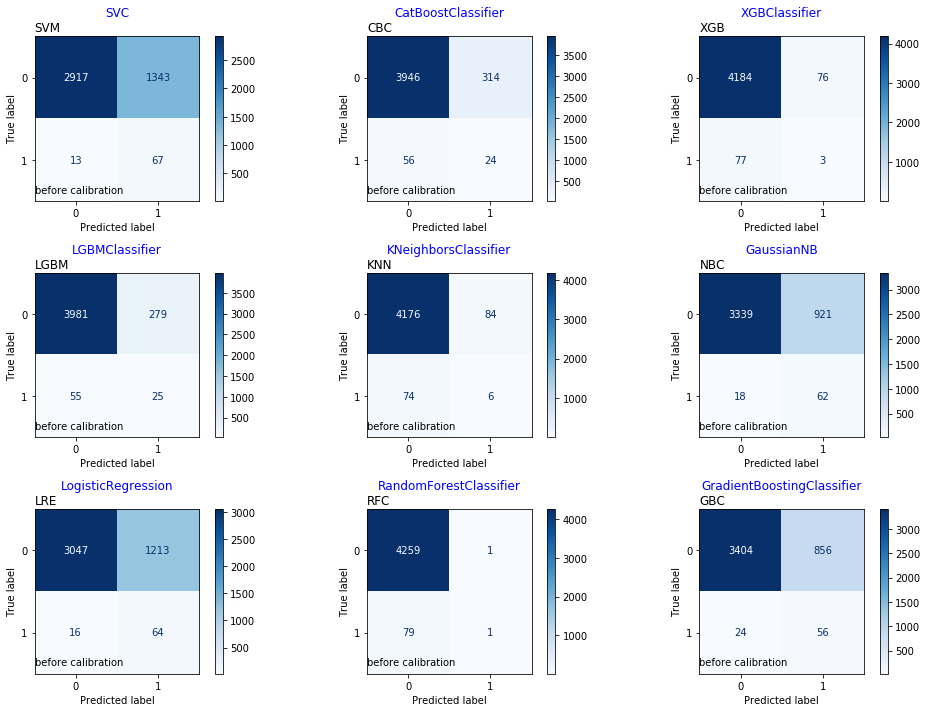

In [19]:
confusion_matrix(classifiers_A,nameA,X_train, y_train,X_test,y_test,calibration=False)

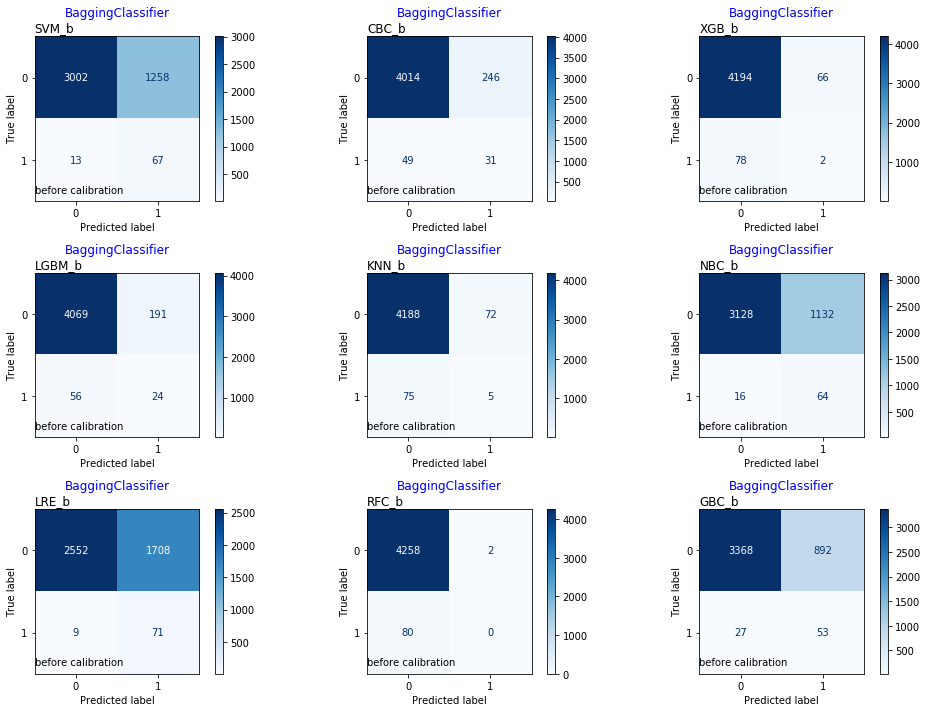

In [20]:
confusion_matrix(classifiers_B,nameB,X_train, y_train,X_test,y_test,calibration=False)

## <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3">Recall - Precision!

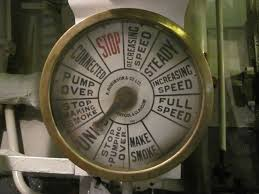


In [21]:
def Recall_Precision(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=True):

    from sklearn.datasets import make_classification
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve  
    
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
    from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report
    from sklearn.metrics import accuracy_score
    from mlxtend.plotting import plot_learning_curves
    from prettytable import PrettyTable
    import time   
    
    start_time = time.time()
    
    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train)
      
    
    Recall_Training = ['Recall Training: ']
    Precision_Training = ['Precision Training: ']
    Recall_Test= ['Recall Test: ']
    Precision_Test = ['Precision Test: ']
    
    CAL_Recall_Training = ['CAL_Recall Training: ']
    CAL_Precision_Training = ['CAL_Precision Training: ']
    CAL_Recall_Test= ['CAL_Recall Test: ']
    CAL_Precision_Test = ['CAL_Precision Test: ']   

    def compute_metric2(model):

        Recall_Training = np.round(recall_score(y_train, model.predict(X_train)), decimals=3)
        Precision_Training = np.round(precision_score(y_train, model.predict(X_train)), decimals=3)
        Recall_Test = np.round(recall_score(y_test, model.predict(X_test)), decimals=3) 
        Precision_Test = np.round(precision_score(y_test, model.predict(X_test)), decimals=3)
        
        return Recall_Training, Precision_Training, Recall_Test, Precision_Test
    
    for cls in six_classifiers:

        results = compute_metric2(cls)
        Recall_Training.append(results[0])
        Precision_Training.append(results[1])
        Recall_Test.append(blue(results[2],'bold'))
        Precision_Test.append((blue(results[3],'bold')))
   
    
    t = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
    t.add_row(Recall_Training)
    t.add_row(Precision_Training)
    t.add_row(Recall_Test)
    t.add_row(Precision_Test)

    
    print(blue('Models before calibration','bold'))
    g = (time.time() - start_time)
    g = np.round(g)
    print('time: %s seconds' % g)
    print(t)
    
  ### ---------------------------------------------------------  
    
    
    if calibration != True:
        print()
    else:    
        print(blue('Models after calibration','bold'))

            
        def calibration(model):
        
            calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
            calibrated.fit(X_train, y_train)
       
            
        
            CAL_Recall_Training = np.round(recall_score(y_train, calibrated.predict(X_train)), decimals=3)
            CAL_Precision_Training = np.round(precision_score(y_train, calibrated.predict(X_train)), decimals=3)
            CAL_Recall_Test = np.round(recall_score(y_test, calibrated.predict(X_test)), decimals=3) 
            CAL_Precision_Test = np.round(precision_score(y_test, calibrated.predict(X_test)), decimals=3)
        
            return CAL_Recall_Training, CAL_Precision_Training, CAL_Recall_Test, CAL_Precision_Test 
    
        start_time = time.time()
    
        for cls in six_classifiers:

            results = calibration(cls)
            CAL_Recall_Training.append(results[0])
            CAL_Precision_Training.append(results[1])
            CAL_Recall_Test.append(blue(results[2],'bold'))
            CAL_Precision_Test.append((blue(results[3],'bold')))
   
        k = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
        k.add_row(CAL_Recall_Training)
        k.add_row(CAL_Precision_Training)
        k.add_row(CAL_Recall_Test)
        k.add_row(CAL_Precision_Test)   
    
    
        n = (time.time() - start_time)
        n = np.round(n)
        print('time: %s seconds' % n)
        print(k)
    print(blue('Wskaźniki pokazują RECALL i PRECISION dla klasy 1','bold'))
    print(blue('RECALL', 'bold'), blue('procentowy udział chorych dobrze zdiagnozowanych wśród wszystkich ludzi chorych','italic'))
    print(blue('PRECISION', 'bold'), blue('procentowy udział chorych dobrze zdiagnozowanych w populacji ludzi zdiagnozowanych fałszywie (zdrowych uznanych przez model za chorych) i dobrze zdiagnozowanych (chorych uznanych przez model za chorych)','italic'))

In [22]:
Recall_Precision(classifiers_A,nameA,X_train, y_train,X_test,y_test,calibration=True)

Models before calibration
time: 78.0 seconds
+----------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|         Name         |  SVM  |  CBC  |  XGB  |  LGBM |  KNN  |  NBC  |  LRE  |  RFC  |  GBC  |
+----------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|  Recall Training:    | 0.869 |  1.0  |  1.0  |  1.0  |  1.0  | 0.766 | 0.794 |  1.0  | 0.919 |
| Precision Training:  | 0.734 | 0.944 | 0.993 | 0.948 |  1.0  | 0.776 | 0.737 |  1.0  | 0.815 |
|    Recall Test:      | 0.838 |  0.3  | 0.038 | 0.312 | 0.075 | 0.775 |  0.8  | 0.012 |  0.7  |
|   Precision Test:    | 0.048 | 0.071 | 0.038 | 0.082 | 0.067 | 0.063 |  0.05 |  0.5  | 0.061 |
+----------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
Models after calibration
time: 1280.0 seconds
+--------------------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|           Name           |  SV

In [23]:
Recall_Precision(classifiers_B,nameB,X_train, y_train,X_test,y_test,calibration=True)

Models before calibration
time: 420.0 seconds
+----------------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
|         Name         | SVM_b | CBC_b | XGB_b | LGBM_b | KNN_b | NBC_b | LRE_b | RFC_b | GBC_b |
+----------------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
|  Recall Training:    | 0.838 |  1.0  |  1.0  |  1.0   |  1.0  | 0.819 | 0.869 |  1.0  | 0.922 |
| Precision Training:  | 0.741 | 0.953 | 0.995 | 0.968  |  1.0  | 0.753 | 0.683 |  1.0  | 0.815 |
|    Recall Test:      | 0.838 | 0.388 | 0.025 |  0.3   | 0.062 |  0.8  | 0.888 |  0.0  | 0.662 |
|   Precision Test:    | 0.051 | 0.112 | 0.029 | 0.112  | 0.065 | 0.054 |  0.04 |  0.0  | 0.056 |
+----------------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
Models after calibration
time: 4896.0 seconds
+--------------------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
|           Name      

## <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3">Classification score

In [24]:
def classification_score(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=True):

    from sklearn.datasets import make_classification
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve   
    from sklearn.metrics import precision_recall_fscore_support as score
    import time   
    
    start_time = time.time()

    Precision_0 = ['Precision_0: ']
    Precision_1 = ['Precision_1: ']
    Recall_0 = ['Recall_0: ']
    Recall_1 = ['Recall_1: ']
    f1_score_0 = ['f1-score_0: ']
    f1_score_1 = ['f1-score_1: ']
    Support_0 = ['Support_0: ']
    Support_1 = ['Support_1: ']
    
    
    CAL_Precision_0 = ['CAL_Precision_0: ']
    CAL_Precision_1 = ['CAL_Precision_1: ']
    CAL_Recall_0 = ['CAL_Recall_0: ']
    CAL_Recall_1 = ['CAL_Recall_1: ']
    CAL_f1_score_0 = ['CAL_f1-score_0: ']
    CAL_f1_score_1 = ['CAL_f1-score_1: ']
    CAL_Support_0 = ['CAL_Support_0: ']
    CAL_Support_1 = ['CAL_Support_1: ']

    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train)
        
    
    def compute_metric4(model):

        precision, recall, fscore, support = score(y_test, model.predict(X_test))
    
        Precision_0 = np.round(precision[:1],decimals=3).item()
        Precision_1 = np.round(precision[1:],decimals=3).item()
        Recall_0 = np.round(recall[:1],decimals=3).item()
        Recall_1 = np.round(recall[1:],decimals=3).item()
        f1_score_0 = np.round(fscore[:1],decimals=3).item()
        f1_score_1 = np.round(fscore[1:],decimals=3).item()
        Support_0 = np.round(support[:1],decimals=3).item()
        Support_1 = np.round(support[1:],decimals=3).item()
        
        return Precision_0, Precision_1, Recall_0, Recall_1, f1_score_0, f1_score_1, Support_0, Support_1

    for cls in six_classifiers:

        results = compute_metric4(cls)
        Precision_0.append(results[0])
        Precision_1.append(blue(results[1],'bold'))
        Recall_0.append(results[2])
        Recall_1.append(blue(results[3],'bold'))
        f1_score_0.append(results[4])
        f1_score_1.append(blue(results[5],'bold'))
        Support_0.append(results[6])
        Support_1.append(blue(results[7],'bold'))
         

    t = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
    t.add_row(Precision_0)
    t.add_row(Precision_1)
    t.add_row(Recall_0)
    t.add_row(Recall_1)
    t.add_row(f1_score_0)
    t.add_row(f1_score_1)
    t.add_row(Support_0)
    t.add_row(Support_1)


    print(blue('Models before calibration','bold'))
    g = (time.time() - start_time)
    g = np.round(g)
    print('time: %s seconds' % g)
    print(t)
    
   ## ------------------------------------------

    if calibration != True:
        print()
    else:    
        print(blue('Models after calibration','bold'))
  
        start_time = time.time()
    
        def calibration(model):
        
            calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
            calibrated.fit(X_train, y_train)
            precision, recall, fscore, support = score(y_test, calibrated.predict(X_test))
                
            CAL_Precision_0 = np.round(precision[:1],decimals=3).item()
            CAL_Precision_1 = np.round(precision[1:],decimals=3).item()
            CAL_Recall_0 = np.round(recall[:1],decimals=3).item()
            CAL_Recall_1 = np.round(recall[1:],decimals=3).item()
            CAL_f1_score_0 = np.round(fscore[:1],decimals=3).item()
            CAL_f1_score_1 = np.round(fscore[1:],decimals=3).item()
            CAL_Support_0 = np.round(support[:1],decimals=3).item()
            CAL_Support_1 = np.round(support[1:],decimals=3).item()
        
            return CAL_Precision_0, CAL_Precision_1, CAL_Recall_0, CAL_Recall_1, CAL_f1_score_0, CAL_f1_score_1, CAL_Support_0, CAL_Support_1
    
        for cls in six_classifiers:

            results = calibration(cls)
            CAL_Precision_0.append(results[0])
            CAL_Precision_1.append(blue(results[1],'bold'))
            CAL_Recall_0.append(results[2])
            CAL_Recall_1.append(blue(results[3],'bold'))
            CAL_f1_score_0.append(results[4])
            CAL_f1_score_1.append(blue(results[5],'bold'))
            CAL_Support_0.append(results[6])
            CAL_Support_1.append(blue(results[7],'bold'))
   
        k = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
        k.add_row(CAL_Precision_0)
        k.add_row(CAL_Precision_1)
        k.add_row(CAL_Recall_0)
        k.add_row(CAL_Recall_1)
        k.add_row(CAL_f1_score_0)
        k.add_row(CAL_f1_score_1)
        k.add_row(CAL_Support_0)
        k.add_row(CAL_Support_1)
    
        n = (time.time() - start_time)
        n = np.round(n)
        print('time: %s seconds' % n)
        print(k)
    print(blue('RECALL', 'bold'), blue('procentowy udział chorych dobrze zdiagnozowanych wśród wszystkich ludzi chorych','italic'))
    print(blue('PRECISION', 'bold'), blue('procentowy udział chorych dobrze zdiagnozowanych w populacji ludzi zdiagnozowanych fałszywie (zdrowych uznanych przez model za chorych) i dobrze zdiagnozowanych (chorych uznanych przez model za chorych)','italic')) 
    

In [25]:
classification_score(classifiers_A,nameA,X_train, y_train,X_test,y_test,calibration=True)

Models before calibration
time: 4.0 seconds
+---------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|      Name     |  SVM  |  CBC  |  XGB  |  LGBM |  KNN  |  NBC  |  LRE  |  RFC  |  GBC  |
+---------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| Precision_0:  | 0.996 | 0.986 | 0.982 | 0.986 | 0.983 | 0.995 | 0.995 | 0.982 | 0.993 |
| Precision_1:  | 0.048 | 0.071 | 0.038 | 0.082 | 0.067 | 0.063 |  0.05 |  0.5  | 0.061 |
|   Recall_0:   | 0.685 | 0.926 | 0.982 | 0.935 |  0.98 | 0.784 | 0.715 |  1.0  | 0.799 |
|   Recall_1:   | 0.838 |  0.3  | 0.038 | 0.312 | 0.075 | 0.775 |  0.8  | 0.012 |  0.7  |
|  f1-score_0:  | 0.811 | 0.955 | 0.982 |  0.96 | 0.981 | 0.877 | 0.832 | 0.991 | 0.886 |
|  f1-score_1:  |  0.09 | 0.115 | 0.038 |  0.13 | 0.071 | 0.117 | 0.094 | 0.024 | 0.113 |
|  Support_0:   |  4260 |  4260 |  4260 |  4260 |  4260 |  4260 |  4260 |  4260 |  4260 |
|  Support_1:   |   80  |   80  |   80  |   80  |   80  

In [26]:
classification_score(classifiers_B,nameB,X_train, y_train,X_test,y_test,calibration=True)

Models before calibration
time: 23.0 seconds
+---------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
|      Name     | SVM_b | CBC_b | XGB_b | LGBM_b | KNN_b | NBC_b | LRE_b | RFC_b | GBC_b |
+---------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
| Precision_0:  | 0.996 | 0.988 | 0.982 | 0.986  | 0.982 | 0.995 | 0.996 | 0.982 | 0.992 |
| Precision_1:  | 0.051 | 0.112 | 0.029 | 0.112  | 0.065 | 0.054 |  0.04 |  0.0  | 0.056 |
|   Recall_0:   | 0.705 | 0.942 | 0.985 | 0.955  | 0.983 | 0.734 | 0.599 |  1.0  | 0.791 |
|   Recall_1:   | 0.838 | 0.388 | 0.025 |  0.3   | 0.062 |  0.8  | 0.888 |  0.0  | 0.662 |
|  f1-score_0:  | 0.825 | 0.965 | 0.983 | 0.971  | 0.983 | 0.845 | 0.748 |  0.99 |  0.88 |
|  f1-score_1:  | 0.095 | 0.174 | 0.027 | 0.163  | 0.064 |  0.1  | 0.076 |  0.0  | 0.103 |
|  Support_0:   |  4260 |  4260 |  4260 |  4260  |  4260 |  4260 |  4260 |  4260 |  4260 |
|  Support_1:   |   80  |   80  |   80  |   8

## <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3">AUC score

In [27]:
def AUC_score(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=True):
    
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve
    from sklearn import metrics
    import time   
    
    start_time = time.time()

    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train)    
    
    AUC_train = ['AUC_train: ']
    AUC_test = ['AUC_test: ']
    CAL_AUC_train = ['AUC_train: ']
    CAL_AUC_test = ['AUC_test: ']
    
    
    def compute_metric(model):

        auc_train = np.round(metrics.roc_auc_score(y_train,model.predict_proba(X_train)[:,1]),decimals=3)
        auc_test = np.round(metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1]),decimals=3)

        return auc_train, auc_test

    for cls in six_classifiers:

        results = compute_metric(cls)
        AUC_train.append(results[0])
        AUC_test.append(blue(results[1],'bold'))


    t = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
    t.add_row(AUC_train)
    t.add_row(AUC_test)
    
    
    print(blue('Models before calibration','bold'))
    g = (time.time() - start_time)
    g = np.round(g)
    print('time: %s secondS' % g)
    print(t)
    
    if calibration != True:
        print()
    else:    
        print(blue('Models after calibration','bold'))
    
        start_time = time.time()
    
        def calibration(model):
        
            calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
            calibrated.fit(X_train, y_train)
         
            CAL_AUC_train = np.round(metrics.roc_auc_score(y_train,calibrated.predict_proba(X_train)[:,1]),decimals=3)
            CAL_AUC_test = np.round(metrics.roc_auc_score(y_test,calibrated.predict_proba(X_test)[:,1]),decimals=3)

            return CAL_AUC_train, CAL_AUC_test

    
        for cls in six_classifiers:

            results = calibration(cls)
            CAL_AUC_train.append(results[0])
            CAL_AUC_test.append(blue(results[1],'bold'))
       
   
        k = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
        k.add_row(CAL_AUC_train)
        k.add_row(CAL_AUC_test)
    
        n = (time.time() - start_time)
        n = np.round(n)
        print('time: %s seconds' % n)    
        print(k)
    

In [28]:
AUC_score(classifiers_A,nameA,X_train, y_train,X_test,y_test,calibration=True)

Models before calibration
time: 37.0 secondS
+-------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|     Name    |  SVM  |  CBC  |  XGB  |  LGBM |  KNN  |  NBC  |  LRE  |  RFC  |  GBC  |
+-------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| AUC_train:  |  0.85 | 0.996 |  1.0  | 0.999 |  1.0  |  0.84 | 0.827 |  1.0  |  0.93 |
|  AUC_test:  | 0.848 | 0.784 | 0.755 | 0.794 | 0.528 | 0.847 | 0.844 | 0.793 | 0.823 |
+-------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
Models after calibration
time: 1046.0 seconds
+-------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
|     Name    |  SVM  |  CBC  |  XGB  |  LGBM |  KNN  |  NBC  |  LRE  |  RFC  |  GBC  |
+-------------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| AUC_train:  |  0.85 | 0.998 |  1.0  | 0.999 |  1.0  |  0.84 | 0.764 |  1.0  | 0.931 |
|  AUC_test:  | 0.848 |  0.81

In [29]:
AUC_score(classifiers_B,nameB,X_train, y_train,X_test,y_test,calibration=True)

Models before calibration
time: 211.0 secondS
+-------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
|     Name    | SVM_b | CBC_b | XGB_b | LGBM_b | KNN_b | NBC_b | LRE_b | RFC_b | GBC_b |
+-------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
| AUC_train:  | 0.847 | 0.999 |  1.0  | 0.999  |  1.0  | 0.843 | 0.814 |  1.0  | 0.934 |
|  AUC_test:  | 0.844 | 0.834 | 0.784 | 0.809  | 0.586 | 0.844 | 0.818 | 0.835 | 0.824 |
+-------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
Models after calibration
time: 3620.0 seconds
+-------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
|     Name    | SVM_b | CBC_b | XGB_b | LGBM_b | KNN_b | NBC_b | LRE_b | RFC_b | GBC_b |
+-------------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
| AUC_train:  | 0.848 | 0.999 |  1.0  |  1.0   |  1.0  |  0.84 | 0.825 |  1.0  | 0.935 |
|  AUC_test:  | 0.

## <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3">Binary Classficators Plots  
    
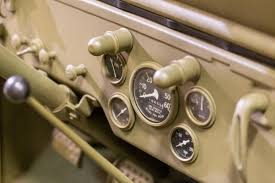

In [30]:
def BinaryClassPlot(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=True):
    
    import time
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve
    from matplotlib import rcParams      ## Robie odstęp na podtytuł
    rcParams['axes.titlepad'] = 20 
    
    start_time = time.time()
    
    from plot_metric.functions import BinaryClassification

    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train) 
       
    plt.figure(figsize=(15,10))
    grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.5)
        
    for i in range(9):
        col, row = i%3,i//3
        ax = plt.subplot(grid[row,col]) 
        ax.title.set_color('blue')
            
        model = six_classifiers[i]
        bc = BinaryClassification(y_test, model.predict_proba(X_test)[:,1], labels=["Class 1", "Class 2"])
        bc.plot_roc_curve(title=type(six_classifiers[i]).__name__)
        ax.text(0.0, 1.09, 'before calibration',color='black', fontsize=10) 
        ax.text(0.5, 1.09, name[i],fontsize=10)    ## podtytuł

 ### ------------------------------------------------------------------------------       
    if calibration != True:
        print()
    else:    
           
        #for cls in six_classifiers:
        #    cls.fit(X_train, y_train)
                            
        plt.figure(figsize=(15,10))
        grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.5)

        for i in range(9):
            col, row = i%3,i//3
            ax = plt.subplot(grid[row,col]) 
            ax.title.set_color('blue')
            
            model = six_classifiers[i]
            calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
            calibrated.fit(X_train, y_train)        
                
            bc = BinaryClassification(y_test, calibrated.predict_proba(X_test)[:,1], labels=["Class 1", "Class 2"])
            bc.plot_roc_curve(title=type(six_classifiers[i]).__name__)
            ax.text(0.0, 1.09, 'after calibration',color='red', fontsize=10)    ## podtytuł     
            ax.text(0.5, 1.09, name[i],fontsize=10)    ## podtytuł   
        
        
        n = (time.time() - start_time)
        n = np.round(n)
        print('time: %s seconds' % n)    

time: 919.0 seconds


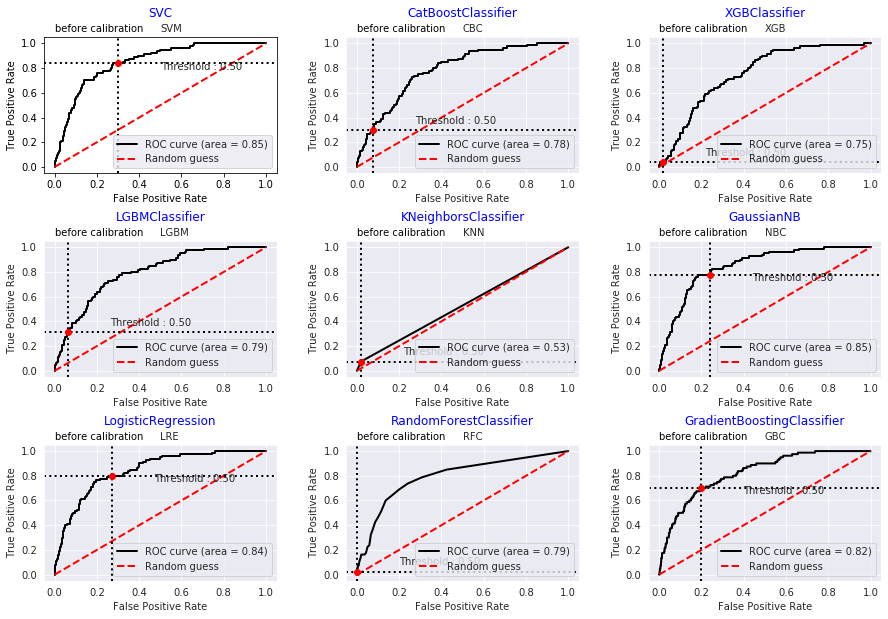

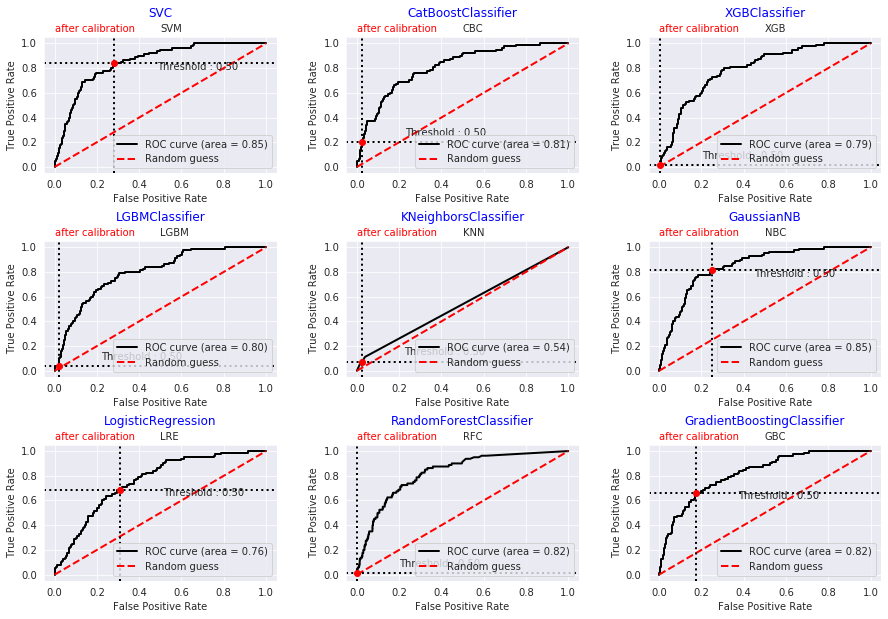

In [31]:
BinaryClassPlot(classifiers_A,nameA,X_train, y_train,X_test,y_test,calibration=True)

time: 3310.0 seconds


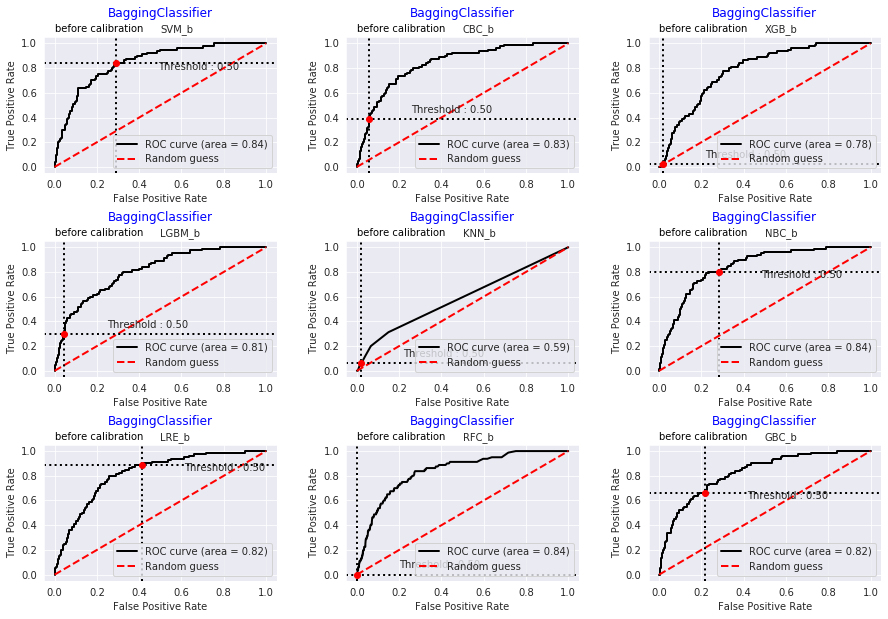

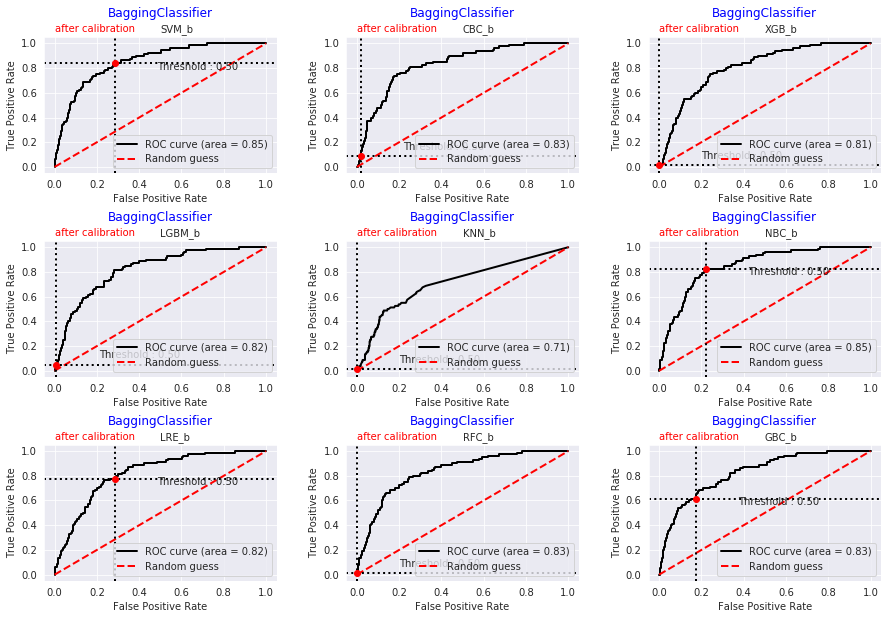

In [32]:
BinaryClassPlot(classifiers_B,nameB,X_train, y_train,X_test,y_test,calibration=True)

The analysis shows that the best models in the basic version and after bagging are LRE and SVC.
In the version after cross-validation, SVM, NBC, LRE, RFC2, SVM2 deserve attention.

## <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3"> ROC AUC plots

In [33]:
def plot_roc(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=True):
    
    import time
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve
    from matplotlib import rcParams      ## Robie odstęp na podtytuł
    rcParams['axes.titlepad'] = 20 
    
    import scikitplot as skplt
    
    start_time = time.time()
    
    plt.figure(figsize=(15,10))
    grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.5)

    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train)

    for i in range(9):

        col, row = i%3,i//3
        ax = plt.subplot(grid[row,col]) 
        ax.title.set_color('blue')

        model = classifiers_A[i]
        skplt.metrics.plot_roc(y_test, model.predict_proba(X_test), ax=ax, title=type(six_classifiers[i]).__name__)
        ax.text(0.5, 1.09, name[i],fontsize=10)    ## podtytuł
        ax.text(0.0, 1.09, 'before calibration',color='black', fontsize=10)
## ---------------------------------------------------------------------------------------------------
    
    if calibration != True:
        print()
    else:    
    
    
        plt.figure(figsize=(15,10))
        grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.5)
    
    
        #for cls in six_classifiers:
        #    cls.fit(X_train, y_train)

        for i in range(9):

            col, row = i%3,i//3
            ax = plt.subplot(grid[row,col]) 
            ax.title.set_color('blue')

            model = classifiers_A[i]
            calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
            calibrated.fit(X_train, y_train)        
        
            skplt.metrics.plot_roc(y_test, calibrated.predict_proba(X_test), ax=ax, title=type(six_classifiers[i]).__name__)
            ax.text(0.5, 1.09, name[i],fontsize=10)    ## podtytuł
            ax.text(0.0, 1.09, 'after calibration',color='red', fontsize=10)    ## podtytuł  
    
    n = (time.time() - start_time)
    n = np.round(n)
    print('time: %s seconds' % n)    

time: 941.0 seconds


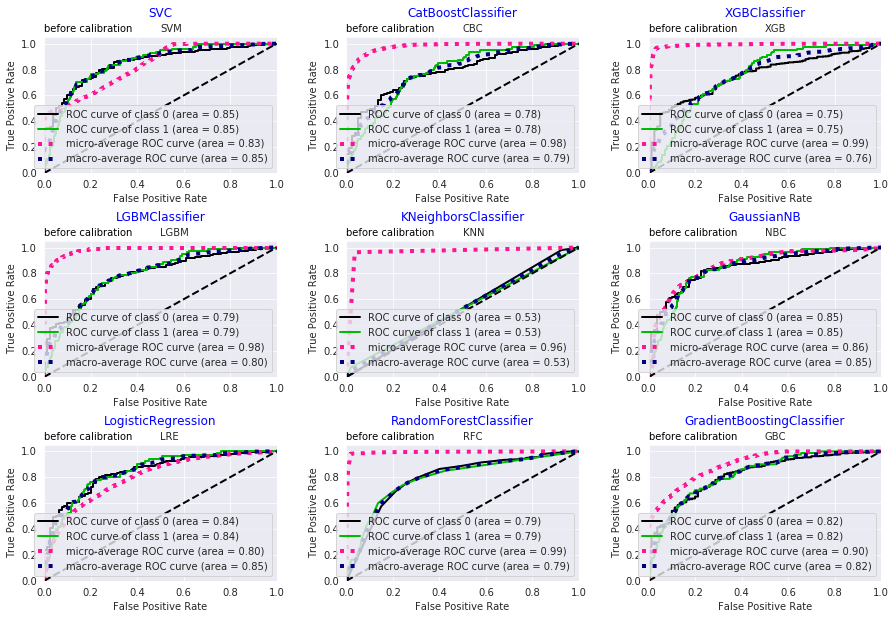

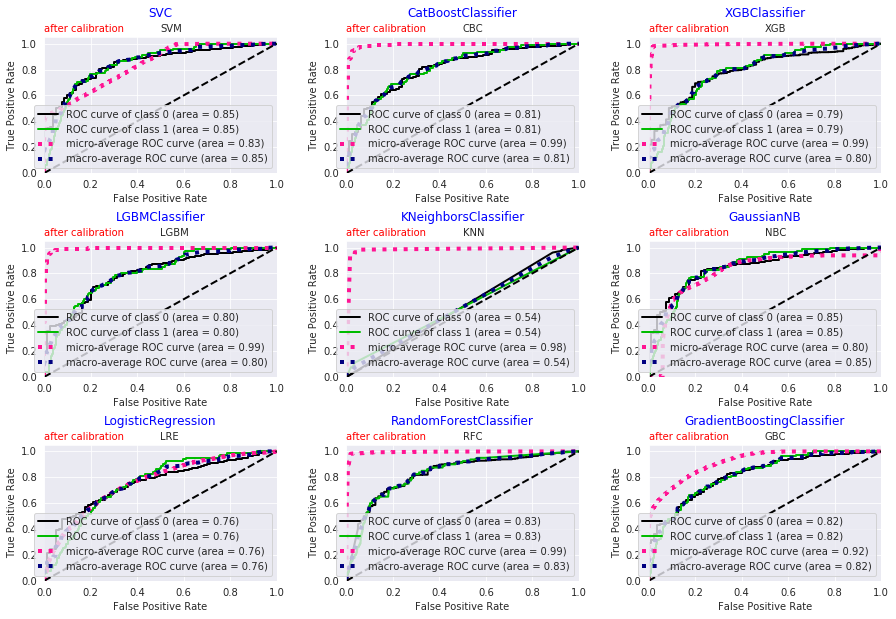

In [34]:
plot_roc(classifiers_A,nameA,X_train, y_train,X_test,y_test,calibration=True)

time: 942.0 seconds


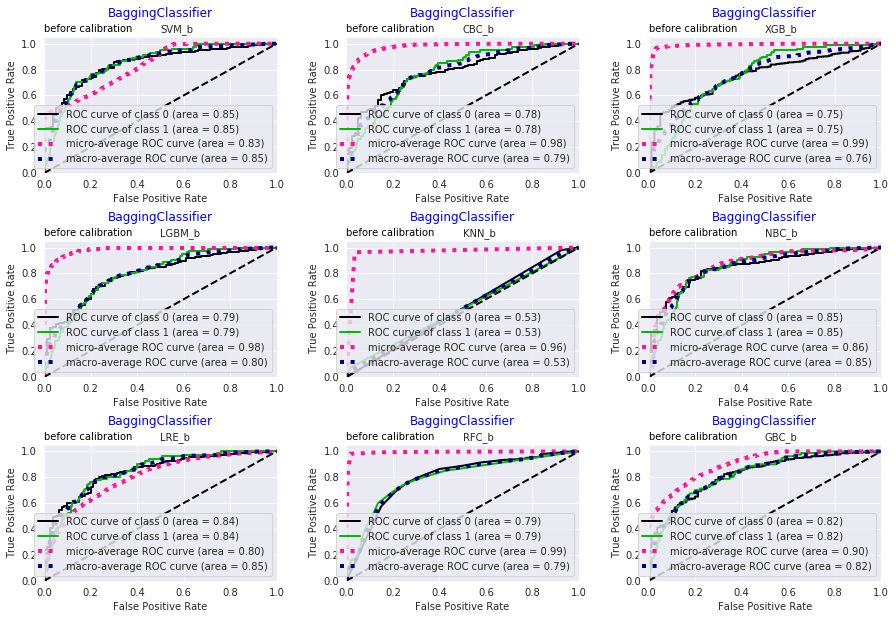

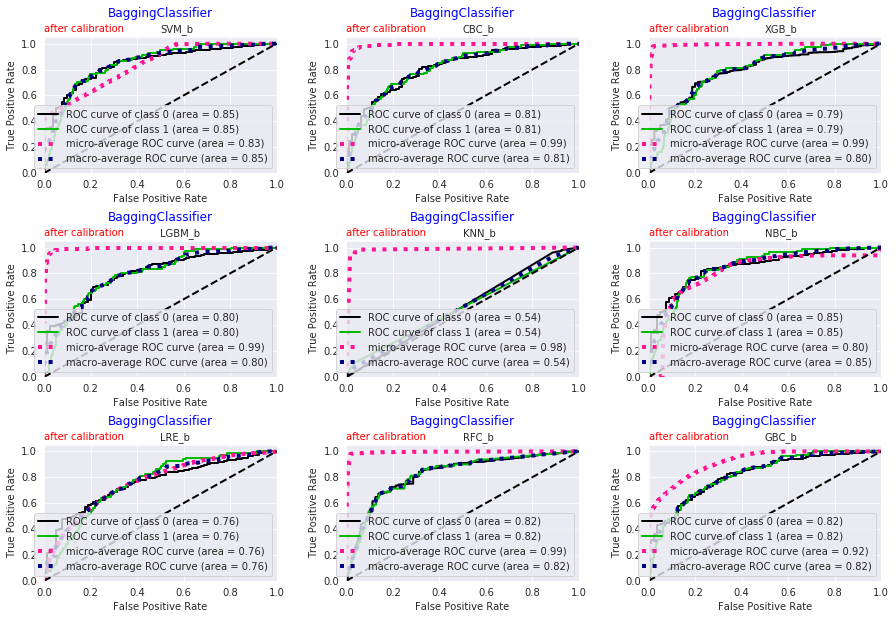

In [35]:
plot_roc(classifiers_B,nameB,X_train, y_train,X_test,y_test,calibration=True)

W tym teście szczególnie waża jest różnica pomiedzy <span style="background:#ff00ff"> krzywą micro-average ROC pokazaną na różowo</span> oraz <span style="color:#0000ff"> krzywą macro-average ROC pokazana na granatowo</span>.
Idealnie gdy obie krzywe się pokrywają. Zbilansowanie klas prze oversampling poprawiło w wielu medelach spójność obu krzywych, w niektórych jednak pozostały duże różnice.

Jeżeli: 

<span style="font-size: 150%;color:#0000ff">macro average ROC</span><span style="font-size: 250%"> > </span> <span style="font-size: 150%;background:#ff00ff">micro average ROC</span> 
wtedy mówimy, że: "1 (minority) is better classified than 0 (majority) - macro > micro"

Jeżeli:

<span style="font-size: 150%;color:#0000ff">macro average ROC</span><span style="font-size: 250%"> < </span> <span style="font-size: 150%;background:#ff00ff">micro average ROC</span> 
wtedy mówimy, że: '0 (majority) is better classified than 1 (minority)- micro < macro'


Idealnie gdy krzywe micro i macro pokrywają się ze sobą. Taka sytuacja ma miejsce po oversampling w GaussianNB oraz GradientBoostingClassifier.



## <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3">Cohen Kappa Metric

<font size="3"> 
$ \bbox[20px,border:1px solid red]
{
 κ = \displaystyle\frac{(p_o - p_e)}{(1 - p_e)}=1-\frac{1 - p_e}{1 - p_e}
\qquad   
} $


where: 

$ p_0 = \displaystyle\frac{(tn+𝑡𝑝)}{(tn+fp+fn+𝑡𝑝)}$

$ p_{empire} = \displaystyle\frac{(tn+fp)}{(tn+fp+fn+𝑡𝑝)}\times\frac{(tn+fn)}{(tn+fp+fn+𝑡𝑝)}$

$ p_{theory} = \displaystyle\frac{(fn+𝑡𝑝)}{(tn+fp+fn+𝑡𝑝)}\times\frac{(fp+𝑡𝑝)}{(tn+fp+fn+𝑡𝑝)}$


$ p_e = p_{empire}+p_{theory}$



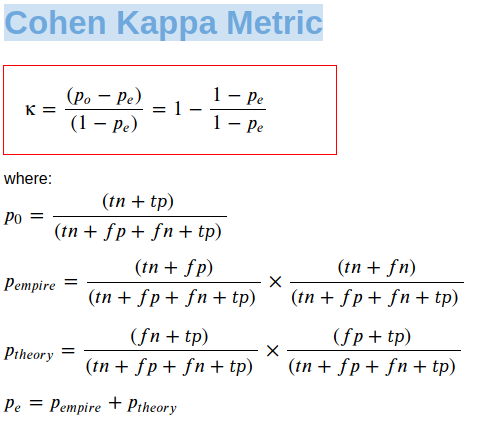

In [36]:
def Cohen_Kappa(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=False):
    
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve
    from sklearn import metrics
    import simple_colors
    import time   
    
    start_time = time.time()
    
    κ = ['κ:']
    p0 = ['p0:']
    pe = ['pe:']
    
    κc = ['κ:']
    p0c = ['p0:']
    pec = ['pe:']    
    
    
    
    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train)    
    
    def compute_metric(model):
        
        from sklearn.metrics import confusion_matrix

        #model.fit(X_train,y_train)
        cm = confusion_matrix(y_test, model.predict(X_test))
        tn, fp, fn, tp = cm.ravel()     
        
        p0 = (tn+𝑡𝑝)/(tn+fp+fn+𝑡𝑝)
        P_empire = ((tn+fp)/(tn+fp+fn+𝑡𝑝))*((tn+fn)/(tn+fp+fn+𝑡𝑝))
        P_theory = ((fn+𝑡𝑝)/(tn+fp+fn+𝑡𝑝))*((fp+𝑡𝑝)/(tn+fp+fn+𝑡𝑝))
        pe = P_empire + P_theory
        κ = (p0-pe)/(1-pe)
        
        κ = np.round(κ,decimals=3)
        p0 = np.round(p0,decimals=3)
        pe = np.round(pe,decimals=3)
        
        return κ,p0, pe

    for cls in six_classifiers:
        
        results = compute_metric(cls)
        κ.append(blue(results[0],'bold'))
        p0.append(results[1])
        pe.append(results[2])
      

    t = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
    t.add_row(p0)
    t.add_row(pe)
    t.add_row(κ)

    print(blue('Models before calibration','bold'))
    g = (time.time() - start_time)
    g = np.round(g)
    print('time: %s second' % g)
    print(t)   
    print()
  ###------------------------------------------------------------  
    
    if calibration != True:
        print()
    else:   
        print(blue('Models after calibration','bold'))
        
        plt.figure(figsize=(15,10))
        grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.5)
        
        start_time = time.time()
    
        def compute_metric2(model):
            
            calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
            calibrated.fit(X_train, y_train)     
            
            calibrated = calibrated.fit(X_train,y_train)
            cm = confusion_matrix(y_test, calibrated.predict(X_test))
            tn, fp, fn, tp = cm.ravel()
   
        
            p0c = (tn+𝑡𝑝)/(tn+fp+fn+𝑡𝑝)
            P_empire = ((tn+fp)/(tn+fp+fn+𝑡𝑝))*((tn+fn)/(tn+fp+fn+𝑡𝑝))
            P_theory = ((fn+𝑡𝑝)/(tn+fp+fn+𝑡𝑝))*((fp+𝑡𝑝)/(tn+fp+fn+𝑡𝑝))
            pec = P_empire + P_theory
            κc = (p0c-pec)/(1-pec)
        
            κc = np.round(κc,decimals=3)
            p0c = np.round(p0c,decimals=3)
            pec = np.round(pec,decimals=3)
        
            return κc,p0c, pec

        for cls in six_classifiers:
        
            results = compute_metric2(cls)
            κc.append(blue(results[0],'bold'))
            p0c.append(results[1])
            pec.append(results[2])
      

        k = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
        k.add_row(p0c)
        k.add_row(pec)
        k.add_row(κc)

        n = (time.time() - start_time)
        n = np.round(n)
        print('time: %s second' % n)         
        print(k)
    
    print(blue('Obserwowana zgodność p0', 'underlined'))
    print(black('Jest to prawdopodobieństwo dobrego wyboru, to procent przypadków, które zostały sklasyfikowane prawidłowo w całej matrycy zamieszania, czyli prawdziwi chorzy zostali sklasyfikowani jako chorzy a prawdziwie zdrowi sklasyfikowani jako prawdziwie zdrowi','italic'))
    print(blue('Oczekiwana zgodność pe', 'underlined'))
    print(black('Jest to prawdopodobieństwo wyboru bezpośrednio związana z liczbą wystąpień każdej klasy. Jeżeli wystąpień klas było po równo (np. 1: 20 wystąpień i 0: 20 wystapień), czyli zbiór był zbilansowany, to prawdopodobieństwo wynosi 50%. ','italic'))
    print(blue('Cohen Kappa mówi, o ile lepszy jest model klasyfikacji (p0) od losowego klasyfikatora(pe), który przewiduje na podstawie częstotliwości klas.','italic'))
    print(black(''))
    print(black('Statystyka może być ujemna, co oznacza, że nie ma skutecznej zgodności między dwoma wskaźnikami lub zgodność jest gorsza niż losowa.'))

In [37]:
Cohen_Kappa(classifiers_A,nameA, X_train, y_train,X_test,y_test,calibration=False)

Models before calibration
time: 5.0 second
+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| Name |  SVM  |  CBC  |  XGB  |  LGBM |  KNN  |  NBC  |  LRE  |  RFC  |  GBC  |
+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| p0:  | 0.688 | 0.915 | 0.965 | 0.923 | 0.964 | 0.784 | 0.717 | 0.982 | 0.797 |
| pe:  | 0.669 | 0.907 | 0.964 | 0.914 | 0.962 | 0.763 | 0.698 | 0.981 | 0.779 |
|  κ:  | 0.057 | 0.088 |  0.02 | 0.104 | 0.052 | 0.085 | 0.062 | 0.024 | 0.082 |
+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+


Obserwowana zgodność p0
Jest to prawdopodobieństwo dobrego wyboru, to procent przypadków, które zostały sklasyfikowane prawidłowo w całej matrycy zamieszania, czyli prawdziwi chorzy zostali sklasyfikowani jako chorzy a prawdziwie zdrowi sklasyfikowani jako prawdziwie zdrowi
Oczekiwana zgodność pe
Jest to prawdopodobieństwo wyboru bezpośrednio związana z liczbą wystąpień każdej klasy. J

In [38]:
Cohen_Kappa(classifiers_B,nameB, X_train, y_train,X_test,y_test,calibration=False)

Models before calibration
time: 24.0 second
+------+-------+-------+-------+--------+-------+-------+-------+--------+-------+
| Name | SVM_b | CBC_b | XGB_b | LGBM_b | KNN_b | NBC_b | LRE_b | RFC_b  | GBC_b |
+------+-------+-------+-------+--------+-------+-------+-------+--------+-------+
| p0:  | 0.707 | 0.932 | 0.967 | 0.943  | 0.966 | 0.735 | 0.604 | 0.981  | 0.788 |
| pe:  | 0.688 |  0.92 | 0.966 | 0.934  | 0.964 | 0.716 | 0.587 | 0.981  | 0.772 |
|  κ:  | 0.063 | 0.149 |  0.01 |  0.14  | 0.046 | 0.068 | 0.043 | -0.001 | 0.072 |
+------+-------+-------+-------+--------+-------+-------+-------+--------+-------+


Obserwowana zgodność p0
Jest to prawdopodobieństwo dobrego wyboru, to procent przypadków, które zostały sklasyfikowane prawidłowo w całej matrycy zamieszania, czyli prawdziwi chorzy zostali sklasyfikowani jako chorzy a prawdziwie zdrowi sklasyfikowani jako prawdziwie zdrowi
Oczekiwana zgodność pe
Jest to prawdopodobieństwo wyboru bezpośrednio związana z liczbą wystąpień 

# <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3">Matthews Correlation Coefficient MCC  
    
  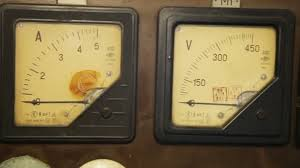

The Matthews Correlation Coefficient (MCC) has a range of -1 to 1, where -1 is a completely bad binary classifier and 1 is a completely valid binary classifier.


<font size="3"> 
$ \bbox[23px,border:1px solid red]
{
 MCC = \displaystyle\frac{{(tp \times tn)}-{(fp \times fn)}}{(tp+fp)(tp+fn)(tn+fp)(tn+fn)}
\qquad   
} $

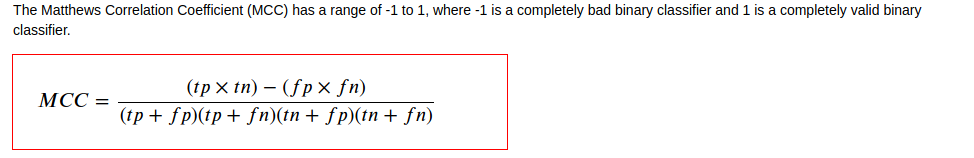

In [39]:
def MCC(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=True):
    
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve
    import time   
    
    start_time = time.time()
    
    from sklearn import metrics
    import simple_colors
    
    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train)    
    
    
    MCC = ['MCC:']
    
    def compute_metric(model):
        
        from sklearn.metrics import confusion_matrix

        #model.fit(X_train,y_train)
        cm = confusion_matrix(y_test, model.predict(X_test))
        tn, fp, fn, tp = cm.ravel()     
        
        MCC = ((tp*tn)-(fp*fn))/(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))** .5)
        MCC = np.round(MCC,decimals=3)
        MCC
        
        return MCC

    for cls in six_classifiers:
        
        results = compute_metric(cls)
        MCC.append(results)
             

    t = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
    t.add_row(MCC)
    
    print('Matthews Correlation Coefficient MCC')
        
    ### ---------------------------------------------------
    
    print(blue('Models before calibration','bold'))
    g = (time.time() - start_time)
    g = np.round(g)
    print('time: %s seconds' % g)
    print(t)
    
    ### ---------------------------------------------------
        
    if calibration != True:
        print()
    else:   
        print(blue('Models after calibration','bold'))

   

        start_time = time.time()
    
        from sklearn import metrics
        import simple_colors
    
        #for cls in six_classifiers:
        #    cls.fit(X_train, y_train)    
    
    
        MCC = ['MCC:']
    
        def compute_metric(model):
        
            from sklearn.metrics import confusion_matrix

            calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
            calibrated.fit(X_train, y_train)    
            cm = confusion_matrix(y_test, calibrated.predict(X_test))
            tn, fp, fn, tp = cm.ravel()     
        
            MCC = ((tp*tn)-(fp*fn))/(((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))** .5)
            MCC = np.round(MCC,decimals=3)
            MCC
        
            return MCC

        for cls in six_classifiers:
        
            results = compute_metric(cls)
            MCC.append(results)
             

        k = PrettyTable(['Name', name[0],name[1],name[2],name[3],name[4],name[5],name[6],name[7],name[8]])
        k.add_row(MCC)
    
        n = (time.time() - start_time)
        n = np.round(n)
        print('time: %s seconds' % n)         
        print(k)
    
       
    print(black('Współczynnik korelacji Matthewsa (MCC) ma zakres od -1 do 1, gdzie -1 oznacza całkowicie zły klasyfikator binarny, a 1 oznacza całkowicie poprawny klasyfikator binarny','italic'))
    

In [40]:
MCC(classifiers_A,nameA, X_train, y_train,X_test,y_test,calibration=True)

Matthews Correlation Coefficient MCC
Models before calibration
time: 5.0 seconds
+------+------+-------+------+------+-------+------+-------+-------+-------+
| Name | SVM  |  CBC  | XGB  | LGBM |  KNN  | NBC  |  LRE  |  RFC  |  GBC  |
+------+------+-------+------+------+-------+------+-------+-------+-------+
| MCC: | 0.15 | 0.114 | 0.02 | 0.13 | 0.052 | 0.18 | 0.152 | 0.077 | 0.165 |
+------+------+-------+------+------+-------+------+-------+-------+-------+
Models after calibration
time: 951.0 seconds
+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| Name |  SVM  |  CBC  |  XGB  |  LGBM |  KNN  |  NBC  |  LRE  |  RFC  |  GBC  |
+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
| MCC: | 0.161 | 0.138 | 0.024 | 0.021 | 0.052 | 0.173 | 0.111 | 0.077 | 0.167 |
+------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
Współczynnik korelacji Matthewsa (MCC) ma zakres od -1 do 1, gdzie -1 oznacza całkow

In [41]:
MCC(classifiers_B,nameB, X_train, y_train,X_test,y_test,calibration=True)

Matthews Correlation Coefficient MCC
Models before calibration
time: 24.0 seconds
+------+-------+-------+-------+--------+-------+-------+-------+--------+-------+
| Name | SVM_b | CBC_b | XGB_b | LGBM_b | KNN_b | NBC_b | LRE_b | RFC_b  | GBC_b |
+------+-------+-------+-------+--------+-------+-------+-------+--------+-------+
| MCC: | 0.158 | 0.181 |  0.01 | 0.158  | 0.046 | 0.161 | 0.133 | -0.003 | 0.148 |
+------+-------+-------+-------+--------+-------+-------+-------+--------+-------+
Models after calibration
time: 3124.0 seconds
+------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
| Name | SVM_b | CBC_b | XGB_b | LGBM_b | KNN_b | NBC_b | LRE_b | RFC_b | GBC_b |
+------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
| MCC: | 0.161 | 0.071 | 0.052 | 0.033  |  nan  | 0.177 | 0.142 |  nan  | 0.165 |
+------+-------+-------+-------+--------+-------+-------+-------+-------+-------+
Współczynnik korelacji Matthewsa (MCC) ma zakre

https://en.wikipedia.org/wiki/Cohen%27s_kappa

## <span style="font-size: 150%;color:#6fa8dc;background:#cfe2f3">Trainsize

In [42]:
def Trainsize(six_classifiers,name, X_train, y_train,X_test,y_test,calibration=True):
    
    import time
    from mlxtend.plotting import plot_learning_curves
    from sklearn.calibration import CalibratedClassifierCV, calibration_curve
    
    start_time = time.time()
    
    #for cls in six_classifiers:
    #    cls.fit(X_train, y_train) 
        
    plt.figure(figsize=(15,7))

    grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.4)

    for i in range(9):
        col, row = i%3,i//3
        ax = plt.subplot(grid[row,col]) 
        ax.title.set_text(type(six_classifiers[i]).__name__)
        ax.title.set_color('blue')
    
        model = six_classifiers[i]
        plot_learning_curves(X_train, y_train, 
                             X_test, y_test, 
                             model, print_model=False, style='ggplot')
        
        ### ---------------------------------------------------
        
    if calibration != True:
        print()
    else:   
        print('IN PENDING')
        #for cls in six_classifiers:
        #    cls.fit(X_train, y_train) 
        
        #plt.figure(figsize=(15,7))

        #grid = plt.GridSpec(3, 3, wspace=0.3, hspace=0.4)

        #for i in range(9):
        #    col, row = i%3,i//3
        #    ax = plt.subplot(grid[row,col]) 
        #    ax.title.set_text(type(six_classifiers[i]).__name__)
        #    ax.title.set_color('blue')
    
            
        #    model = six_classifiers[i]
        #    calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
        #    calibrated.fit(X_train, y_train) 
            
        #    plot_learning_curves(X_train, y_train, 
        #                        X_test, y_test, 
        #                         calibrated, print_model=False, style='ggplot')
                
        
        
    n = (time.time() - start_time)
    n = np.round(n)
    print('time: %s seconds' % n)           
    print('Jeżeli zbiór testowy i treningowy bardzo odstają od siebie oznacza to przeuczenie modelu')
    print('Znajduje się tu miejsce gdzie oba wykresy testowy i treningowy są najbliżej siebie.')
    print('Dla takiej wielkości próby model działa najlepiej w kontekście przeuczenia na wykresie należy brać pod uwagę wielkość błędu klasyfikacji (oś y)')

IN PENDING
time: 1072.0 seconds
Jeżeli zbiór testowy i treningowy bardzo odstają od siebie oznacza to przeuczenie modelu
Znajduje się tu miejsce gdzie oba wykresy testowy i treningowy są najbliżej siebie.
Dla takiej wielkości próby model działa najlepiej w kontekście przeuczenia na wykresie należy brać pod uwagę wielkość błędu klasyfikacji (oś y)


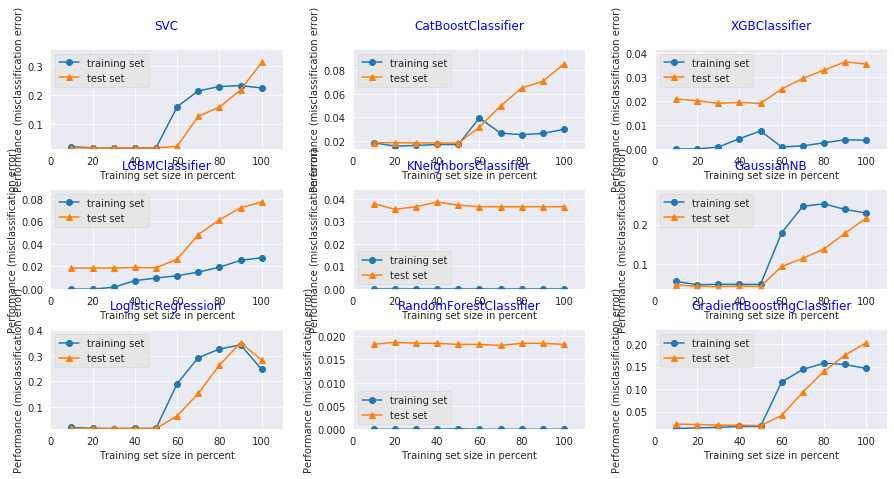

In [43]:
Trainsize(classifiers_A,nameA, X_train, y_train,X_test,y_test,calibration=True)

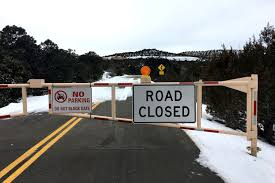

Jak widac na wykresach problemem jest precyzjia klasy 1. Nie pomogła w tym zbilansowanie zbiorów przez oversampling.

https://scikit-learn.org/stable/auto_examples/calibration/plot_calibration_curve.html

### Koniec pomiaru czasu 

In [44]:
print('Time to complete the task')
print('minutes: ',
(time.time() - start_time)/60) ## koniec pomiaru czasu
t = (time.time() - start_time)/60
a,b = df.shape

print('Czas ile minut na jedne rekord: ',t/a)

Time to complete the task
minutes:  512.4912852128347
Czas ile minut na jedne rekord:  0.023617110030259222


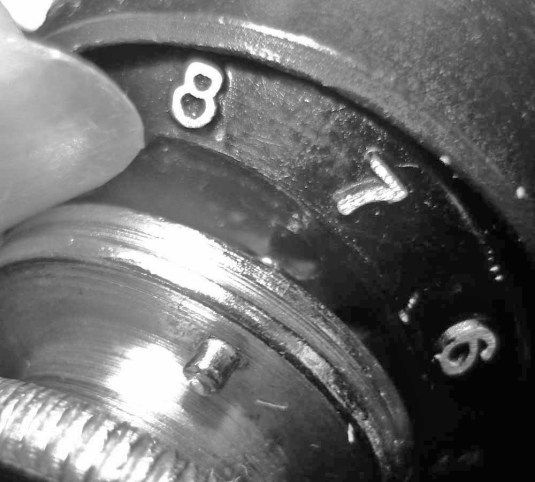